This code is largely borrowed from https://xavierbourretsicotte.github.io/ridge_lasso_visual.html. Addition to that, some improvements are made such that ElasticNet is included in the study. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

plt.style.use('seaborn-white')


def costfunction(X, y, theta):
    '''OLS cost function'''
    # Initialisation of useful values
    m = np.size(y)

    # Cost function in vectorized form
    h = X @ theta
    J = float((1. / (2 * m)) * (h - y).T @ (h - y));
    return J


def closed_form_solution(X, y):
    '''Linear regression closed form solution'''
    return np.linalg.inv(X.T @ X) @ X.T @ y


def closed_form_reg_solution(X, y, lamda=10):
    '''Ridge regression closed form solution'''
    m, n = X.shape
    I = np.eye((n))
    return (np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)[:, 0]


def cost_l2(x, y):
    '''L2 cost functiom'''
    return x ** 2 + y ** 2

def cost_l1(x, y):
    '''L1 cost function'''
    return np.abs(x) + np.abs(y)

def cost_elastic_net(x, y, l1_ratio=0.5):
    '''Elastic cost function'''
    return l1_ratio * cost_l1(x, y) + (1 - l1_ratio) * cost_l2(x, y)


# Creating the dataset (as previously)
x = np.linspace(0, 1, 40)
noise = 1 * np.random.uniform(size=40)
y = np.sin(x * 1.5 * np.pi)
y_noise = (y + noise).reshape(-1, 1)

# Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2 * x, x ** 2)).T

# Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X, axis=0)

lambda_range = np.logspace(0, 4, num=100) / 1000
theta_0_list_reg_l2 = []
theta_1_list_reg_l2 = []

for l in lambda_range:
    t0, t1 = closed_form_reg_solution(X, y_noise, l)
    theta_0_list_reg_l2.append(t0)
    theta_1_list_reg_l2.append(t1)

lambda_range = np.logspace(0, 2, num=100) / 1000
theta_0_list_reg_l1 = []
theta_1_list_reg_l1 = []

for l in lambda_range:
    model_sk_reg = linear_model.Lasso(alpha=l, fit_intercept=False)
    model_sk_reg.fit(X, y_noise)
    t0, t1 = model_sk_reg.coef_
    theta_0_list_reg_l1.append(t0)
    theta_1_list_reg_l1.append(t1)

theta_0_list_reg_en = []
theta_1_list_reg_en = []
for l in lambda_range:
    model_en_reg = linear_model.ElasticNet(alpha=l, l1_ratio=0.5, fit_intercept=False)
    model_en_reg.fit(X, y_noise)
    t0, t1 = model_en_reg.coef_
    theta_0_list_reg_en.append(t0)
    theta_1_list_reg_en.append(t1)


# Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-2, 17, 100), np.linspace(-17, 3, 100))

# Computing the cost function for each theta combination
zz_l2 = np.array([cost_l2(xi, yi) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])  # L2 function
zz_l1 = np.array([cost_l1(xi, yi) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])  # L1 function
zz_ls = np.array([costfunction(X, y_noise.reshape(-1, 1), np.array([t0, t1]).reshape(-1, 1))
                  for t0, t1 in zip(np.ravel(xx), np.ravel(yy))])  # least square cost function
zz_en = np.array([cost_elastic_net(xi, yi) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])  # L1 function

# Reshaping the cost values
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)
Z_en = zz_en.reshape(xx.shape)

# Defining the global min of each function
min_ls = np.linalg.inv(X.T @ X) @ X.T @ y_noise
min_l2 = np.array([0., 0.])
min_l1 = np.array([0., 0.])
min_en = np.array([0., 0.])

C:\Users\arthu\AppData\Local\Temp/ipykernel_16064/922142751.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


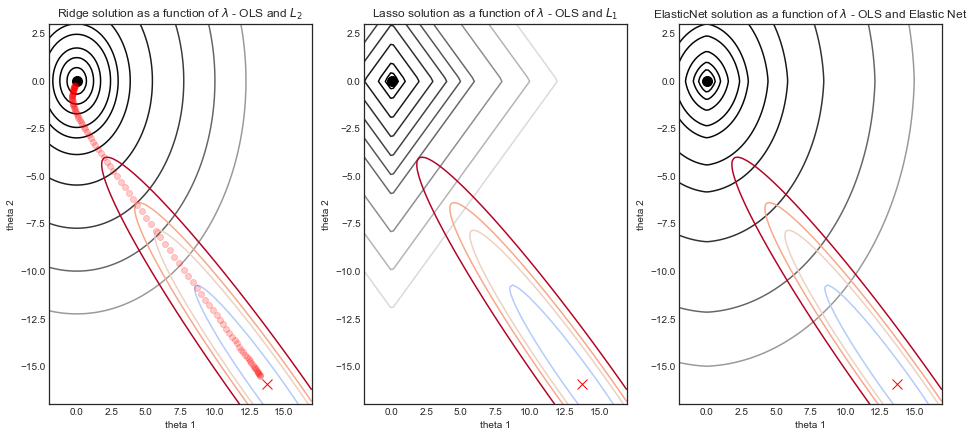

In [2]:
# Plotting the contours - L2
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 3, 1)
ax.contour(xx, yy, Z_l2, levels=[.5, 1.5, 3, 6, 9, 15, 30, 60, 100, 150, 250], cmap='gist_gray')
ax.contour(xx, yy, Z_ls, levels=[.01, .06, .09, .11, .15], cmap='coolwarm')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ')

# Plotting the minimum - L2
ax.plot(min_ls[0], min_ls[1], marker='x', color='red', markersize=10)
ax.plot(0, 0, marker='o', color='black', markersize=10)

# Plotting the path of L2 regularized minimum
ax.plot(theta_0_list_reg_l2, theta_1_list_reg_l2, linestyle='none', marker='o', color='red', alpha=.2)

# Plotting the contours - L1
ax = fig.add_subplot(1, 3, 2)
ax.contour(xx, yy, Z_l1, levels=[.5, 1, 2, 3, 4, 5, 6, 8, 10, 12, 14], cmap='gist_gray')
ax.contour(xx, yy, Z_ls, levels=[.01, .06, .09, .11, .15], cmap='coolwarm')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')

# Plotting the minimum - L1
ax.plot(min_ls[0], min_ls[1], marker='x', color='red', markersize=10)
ax.plot(0, 0, marker='o', color='black', markersize=10)

# Plotting the contours - Elastic Net
ax = fig.add_subplot(1, 3, 3)
ax.contour(xx, yy, Z_en, levels=[.5, 1, 2, 4, 6, 12, 20, 40, 80, 120, 200], cmap='gist_gray')
ax.contour(xx, yy, Z_ls, levels=[.01, .06, .09, .11, .15], cmap='coolwarm')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('ElasticNet solution as a function of $\\lambda$ - OLS and Elastic Net ')

# Plotting the minimum - Elastic Net
ax.plot(min_ls[0], min_ls[1], marker='x', color='red', markersize=10)
ax.plot(0, 0, marker='o', color='black', markersize=10)
fig.show()